# PEC 1 Asignatura Aprendizaje Automático Aplicado

## Máster en Data Science - UCJC

### Curso 2023/2024

Profesor: Francisco Lamas López - francisco.lamas@ucjc.edu

- Fecha de entrega a los alumnos: viernes **22DIC2023**


- Fecha límite de entrega de soluciones: lunes **08ENE2024**


- Fecha orientativa de correcciones: domingo **14ENE2024**

### INSTRUCCIONES:

Resolver individualmente las siguientes 9 preguntas (cada una de las cuales tiene idéntica valoración, 1/9 del total)


Se dará una puntuación sobre 10 a cada alumno para esta PEC1 (25% del total de PEC's)


Rellenar sobre este Notebook (entregar como archivo .ipynb)

**Aspectos importantes a tener en cuenta:**

- Seguir los pasos recomendados en cada una de las 9 preguntas (como listas de ítems en el markdown), ya que os servirán como guía para resolverlas

- Intentar siempre, en la parte de análisis y comparación, plotear y exponer gráficos cuando sea posible sobre los resultados obtenidos

- Comentar y argumentar los resultados obtenidos

**En caso de no poder entregarla a través del BlackBoard, enviar antes de la fecha límite al email francisco.lamas@ucjc.edu (explicar en el email error obtenido durante la subida a BlackBoard)**

### ALUMNO (APELLIDOS, NOMBRE):

Barandiarán Torres, Daniel

### EMAIL ALUMNO:

daniel.barrandiaran@alumno.ucjc.edu

#### Uso de Datasets en la PEC1

En esta práctica, nos enfocaremos en utilizar los datasets que están específicamente incluidos en Scikit-learn. Es importante que todos los datasets que utilices provengan de la sección de **Toy Datasets** que puedes encontrar en la documentación oficial de Scikit-learn.

Puedes acceder a esta sección a través del siguiente enlace: [Toy Datasets en Scikit-learn](https://scikit-learn.org/stable/datasets/toy_dataset.html).

Estos datasets han sido seleccionados por su utilidad y simplicidad para fines educativos, proporcionando una excelente oportunidad para aprender y practicar diversas técnicas de aprendizaje automático. Algunos ejemplos populares de estos datasets incluyen el *Iris dataset*, *Digits dataset*, *Wine dataset*, entre otros.

Asegúrate de explorar y utilizar estos datasets para tus ejercila PEC1.ráctica.


### Pregunta 1

##### Cargar un set de datos y división en distintos porcentajes de train/test


- Descarga un dataset de los reseñados arriba
- Describe las dimensiones del Dataset
- Define si es para hacer Regresión y Clasificación y por qué
- Divide los datos en conjuntos de TRAIN y TEST (en diferentes % de test). Pruebe diferentes parámetros del método train_test_split de Scikit-Learn
- Evalua las características, dimensiones y contenido de los conjuntos de datos resultantes al dividirlos

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [3]:
names = lambda obj, txt = "": print([name for name in dir(obj) if (name[0] != "_") and (txt in name)])

In [133]:
data = datasets.load_iris()

In [134]:
names(data)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [135]:
ext_target = data.target[:, None]
pd.DataFrame(
    np.concatenate((data.data, ext_target, data.target_names[ext_target]), axis=1),
    columns=data.feature_names + ['target label', 'target name'],
)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target label,target name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [136]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [137]:
data.data.shape, data.target.shape

((150, 4), (150,))

Después de cargar la base de datos de iris. Hemos creado a partir de la variable objetivo(target), otra variable con los mismos valores, pero en lugar de con números, con sus nombres. 
Seguidamente hemos comprobado las dimensiones tanto de los features como de la target. Contamos con 4 variables explicativas y 1 variable objetivo, con un total de 150 observaciones en todo el conjunto.

Se trata de un problema de clasificación multiclase, ya que la variable objetivo se trata de una variable categórica, aunque se puede codificar para que sea más fácil de procesar. Y multicalse porque tenemos más de dos opciones en la clasificación, en este caso 3: setosa (0), versicolor (1), y virgínica (2).

In [145]:
X = data.data
y = data.target

In [147]:
y = pd.DataFrame(y)

división 1:

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state=1)
X_train.shape

(120, 4)

In [149]:
y_train.value_counts()

2    44
0    39
1    37
Name: count, dtype: int64

In [150]:
X_train[0:40,0].mean()

6.029999999999999

división 2:

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state=2)
X_train.shape

(120, 4)

In [152]:
y_train.value_counts()

1    42
2    42
0    36
Name: count, dtype: int64

In [153]:
X_train[0:40,0].mean()

5.909999999999999

división 3

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1, stratify = y)
X_train.shape

(120, 4)

In [155]:
y_train.value_counts()

0    40
1    40
2    40
Name: count, dtype: int64

In [156]:
X_train[0:40,0].mean()

5.842499999999999

Analisis:

Hemos realizado 3 divisiones de train y test, cada una con algún parámetro distinto (excepto test_size y shuffle, ya que así es mejor comparable y modificar test_size es modificar el tamaño train y test, el cual es un parámetro facilmente comprensible, y shuffle implica que los datos se mezclen o no, el cual nos interesa que esté mezclado):

- En la primera división hemos seleccionado un tamaño de test de 20% y por lo tanto, un train de 80%. Hemos seleccionado el random_state de 1, el cual funciona como una semilla para poder reproducir siempre el mismo resultado. Para comparar analizar y comparar las divisiones hemos calculado las dimensiones, el tamaño de cada clase de la variable objetivo, y la media de las primeras 40 observaciones de la primera variable. En este caso tenemos 120 filas en el subconjunto train (30 en test), un tamaño de 39, 37 y 44 para las tres clases, y una media de 6.029.

- En la segunda división hemos modificado random_state=2, para ver que diferencias existen. En este caso tenemos 120 filas en el subconjunto train (30 en test), un tamaño de 36, 42 y 42 para las tres clases, y una media de 5.909.

- En la tercera división hemos vuelto a modificar random_state=1 y el parámetro stratify=y (None por defecto), obligando a repartir equitativamente el número de cada clase entre train y test. En este caso tenemos 120 filas en el subconjunto train (30 en test), un tamaño de 40, 40 y 40 para las tres clases, y una media de 5.8424.

Por tanto vemos que al modificar random_state obtenemos diferentes subconjuntos de train y test, así como diferente número de observaciones de cada clase. Vemos como el parámetro stratify=y divide el número de cada clase en partes exactamente iguales, aunque dejarlo como predeterminado intenta que esté bastante igualado también. Y también vemos que la media de las 40 primeras observaciones de la primera variable son bastante semejantes en las 3 divisiones, por lo que en mezclado de las observaciones en cada subconjunto también está bien realizada.

### Pregunta 2

##### Entrenar un modelo de clasificación KNN con un dataset de scikit learn y comparar resultados de predicción entre los conjuntos de train y de test

- Carga un dataset proporcionado por Scikit-Learn
- Prepara los datos para el entrenamiento del modelo, realizando cualquier paso de pre-procesamiento necesario
- Utiliza la función train_test_split para dividir el dataset en conjuntos de entrenamiento y prueba. Ajusta los parámetros adecuadamente para una división equitativa
- Instancia un modelo KNN y entrena este modelo con el conjunto de entrenamiento
- Evalúa la precisión del modelo tanto en el conjunto de entrenamiento como en el de prueba
- Utiliza una métrica de evaluación adecuada para comparar el rendimiento en ambos conjuntos
- Analiza los resultados obtenidos (p.e. dibujar y plotear boundary decisions...) y extraer conclusiones pertinentes, especialmente en caso de encontrar diferencias significativas en el rendimiento entre los conjuntos de entrenamiento y prueba

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [3]:
dataset = datasets.load_wine()
names(dataset)

NameError: name 'names' is not defined

In [4]:
ext_target = dataset.target[:, None]
X = pd.DataFrame(
    np.concatenate((dataset.data, ext_target, dataset.target_names[ext_target]), axis=1),
    columns=dataset.feature_names + ['target_label', 'target_name'],
)
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target_label,target_name
0,14.23,1.71,2.43,15.6,127.0,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.2,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.4,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.8,3.24,0.3,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.5,16.8,113.0,3.85,3.49,0.24,2.18,7.8,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.8,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,2,class_2
174,13.4,3.91,2.48,23.0,102.0,1.8,0.75,0.43,1.41,7.3,0.7,1.56,750.0,2,class_2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,2,class_2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.6,1.62,840.0,2,class_2


In [159]:
X.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target_label                    0
target_name                     0
dtype: int64

In [5]:
y = X.target_label.copy()
X.drop(["target_label", "target_name"], axis=1, inplace=True)

In [6]:
y = y.astype("category").cat.codes

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [163]:
X_train.shape

(142, 13)

In [8]:
from sklearn import preprocessing

normaliser = preprocessing.Normalizer().fit(X_train)

In [9]:
X_train_normalised = normaliser.transform(X_train)
X_train = pd.DataFrame(X_train_normalised)

X_test_normalised = normaliser.transform(X_test)
X_test = pd.DataFrame(X_test_normalised)

In [10]:
from sklearn.decomposition import PCA


pca_reducer = PCA(n_components=2).fit(X_train_normalised)

X_train_pca = pca_reducer.transform(X_train_normalised)
X_test_pca = pca_reducer.transform(X_test_normalised)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_pca, y_train)

KNeighborsClassifier(n_neighbors=8)

In [169]:
print(knn.score(X_train_pca, y_train))

0.7887323943661971


In [170]:
print(knn.score(X_test_pca, y_test))


0.6944444444444444


In [172]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import ListedColormap

matplotlib.style.use('ggplot')

In [173]:
def plotDecisionBoundary(model, X, y, colors, padding=0.6, resolution = 0.0025):
    
  fig = plt.figure(figsize=(8,6))
  ax = fig.add_subplot(111)


  # Calculate the boundaries
  x_min, x_max = X[:, 0].min(), X[:, 0].max()
  y_min, y_max = X[:, 1].min(), X[:, 1].max()
  x_range = x_max - x_min
  y_range = y_max - y_min
  x_min -= x_range * padding
  y_min -= y_range * padding
  x_max += x_range * padding
  y_max += y_range * padding


  # Create a 2D Grid Matrix. The values stored in the matrix
  # are the predictions of the class at at said location
  xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                       np.arange(y_min, y_max, resolution))

  # What class does the classifier say?
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  Z=np.array(Z, dtype=float)

  # Plot the contour map using the rainbow colourmap
  #cs = plt.contourf(xx, yy, Z, cmap=plt.cm.rainbow)
  ax.contourf(xx, yy, Z, cmap=plt.cm.rainbow)
  fig.tight_layout(pad=2)

  # Plot the testing original points as well...
  for label in np.unique(y):
    indices = np.where(y == label)
    ax.scatter(X[indices, 0], X[indices, 1], c=colors[label], alpha=0.8)

  # print the title
  p = model.get_params()
  fig.suptitle('Decision boundaries, K = ' + str(p['n_neighbors']))

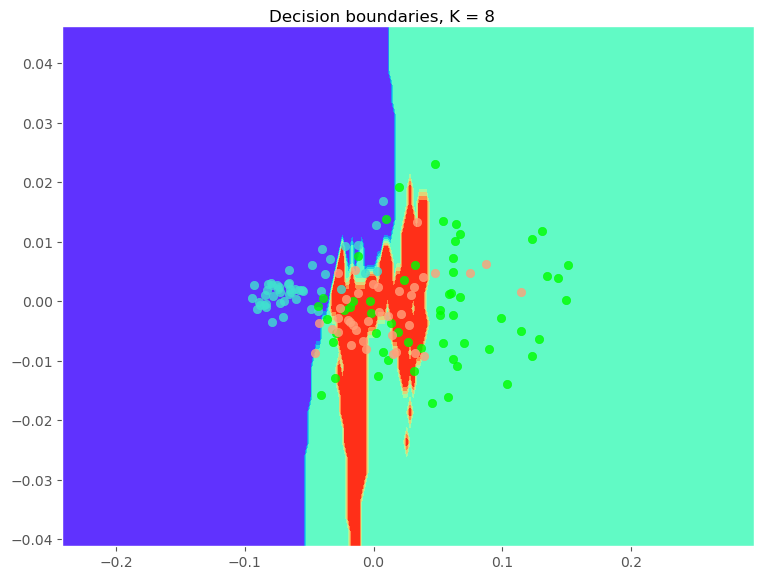

In [178]:
myColours = ['turquoise','lime','lightsalmon']

plotDecisionBoundary(knn, X_train_pca, y_train, colors =  myColours)

La clasificación de la clase 3 parece un poco forzada, esto puede indicar sobreajuste, aunque también es cierto que están muy mezclados las clases 2 y 3. 

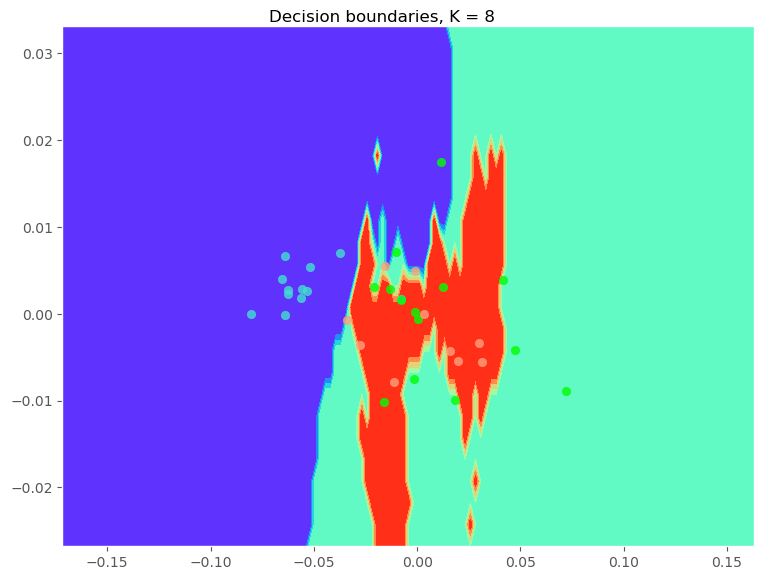

In [180]:
myColours = ['turquoise','lime','lightsalmon']

plotDecisionBoundary(knn, X_test_pca, y_test, colors =  myColours)

Vemos que en el conjunto de prueba no generaliza del todo bien el modelo para las clases 2 y 3, aunque un score de 0.7 es un buen indicativo, y más si la diferencia entre scores train-test es baja como es el caso, por lo que se ajusta bien.

Tras varias exploraciones he podido comprobar que normalizar mejora bastante el score tanto de train como de test, sin embargo, realizar el pca con dos dimensiones empeora un poco estos scores (como es de esperar).

In [147]:
from sklearn.metrics import confusion_matrix,classification_report

In [148]:
knn.fit(X_train, y_train)

y_pred = knn.predict(X_train)

print(classification_report(y_train, y_pred))
print(confusion_matrix(y_train, y_pred))

from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred, y_train))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        47
           1       0.83      0.88      0.85        57
           2       0.86      0.82      0.84        38

    accuracy                           0.87       142
   macro avg       0.87      0.86      0.87       142
weighted avg       0.87      0.87      0.87       142

[[42  5  0]
 [ 2 50  5]
 [ 2  5 31]]
accuracy is 0.8661971830985915


la precisión se calcula como el cociente de verdaderos positivos entre la suma de verdaderos positivos y falsos positivos. Mientras que el recall es el cociente de verdaderos positivos entre la suma de verdaderos positivos y falsos negativos. Un equilibrio entre estos dos nos indica que hay casi tantos errores de tipo 1 como de tipo 2. Y un valor elevado de estos quiere decir que no nos equivocamos tanto en las predicciones. En nuestro ejemplo obtenemos unos valores considerablemente altos para ambos ratios, lo que quiere decir que tenemos un buen clasificador. También comprobamos esto en el accuracy, que es el cociente de todos los aciertos entre el total de observaciones, es decir lo que acierta el modelo. Y el F1 score que es la media entre la precision y el recall.

In [149]:
knn.fit(X_test, y_test)

y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.69      0.79      0.73        14
           2       0.55      0.60      0.57        10

    accuracy                           0.69        36
   macro avg       0.71      0.68      0.69        36
weighted avg       0.72      0.69      0.70        36

[[ 8  2  2]
 [ 0 11  3]
 [ 1  3  6]]
accuracy is 0.6944444444444444


Cuando comparamos entre el conjunto de train y test vemos que existen diferencias significativas, al menos en cuanto la precision y recall, en el conjunto de train obtenemos unos resultados equilibrados y elevados, mientras que en el test obtenemos peores resultados y no tan equilibrados. Por ejemplo vemos que existe una notoria diferencia entre la precisión y el recall en la primera clase, donde se encuentran muchos falsos negativos y muy pocos falsos positivos, o por ejemplo en la tercera clase donde se encuentran muchos falsos negativos y falsos positivos. Esto se podría intentar mejorar aplicando alguna regularización, aterando el tamaño de los subconjuntos de entrenaminto y prueba, o inlcuso escogiendo distintos subconjuntos.

### Pregunta 3

##### Evaluación del Impacto de Parámetros en un Modelo KNN con Scikit-Learn

- Elige y carga un dataset proporcionado por Scikit-Learn que sea adecuado para un modelo de clasificación KNN
- Realiza cualquier pre-procesamiento necesario en el dataset
- Divide el dataset en conjuntos de entrenamiento y prueba utilizando la función train_test_split.
- Elige al menos dos parámetros importantes del modelo KNN para evaluar. Algunas sugerencias pueden ser el número de vecinos (n_neighbors) y el tipo de ponderación de los vecinos (weights)
- Para cada parámetro, entrena múltiples modelos variando los valores de dicho parámetro mientras mantienes constantes los otros
- Utiliza una métrica de rendimiento adecuada, como la precisión, para evaluar el impacto de los distintos valores de cada parámetro en el rendimiento del modelo.
- Realiza este proceso para cada parámetro de forma independiente y registra los resultados
- Determina qué combinaciones de parámetros ofrecen los mejores resultados y saca conclusiones sobre la importancia de cada parámetro evaluado

In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [4]:
digits = datasets.load_digits()

In [5]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
ext_target = digits.target[:, None]
X = pd.DataFrame(
    np.concatenate((digits.data, ext_target, digits.target_names[ext_target]), axis=1),
    columns=digits.feature_names + ['target_label', 'target_name'],
)
X

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target_label,target_name
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0,1.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0,2.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0,3.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9.0,9.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8.0,8.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9.0,9.0


In [199]:
X.isna().sum().sum()

0

In [200]:
y = X.target_label.copy()
X.drop(["target_label", "target_name"], axis=1, inplace=True)

In [201]:
y = y.astype("category").cat.codes

In [205]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [206]:
normaliser = preprocessing.Normalizer().fit(X_train)

In [207]:
X_train_normalised = normaliser.transform(X_train)
X_train = pd.DataFrame(X_train_normalised)

X_test_normalised = normaliser.transform(X_test)
X_test = pd.DataFrame(X_test_normalised)

In [208]:
weights = ['uniform', 'distance']

In [209]:
from sklearn.decomposition import PCA
from sklearn import manifold
from sklearn.metrics import accuracy_score


In [254]:
# the f print function works from Python 3.6, you can use print otherwise
separator = "--------------------------------------"
print('*** Starting K-neighbours classifier')
print(separator)

bestScore = 0.0
  

print("K  | Weight | Score | Accuracy")
print(separator)
  
for k in range(1,16):
    for weight in weights:
        
        #
        # Train the model against data_train. 
        #
        knmodel = KNeighborsClassifier(n_neighbors = k, weights = weight)
        knmodel.fit(X_train, y_train)
        y_pred = knmodel.predict(X_train)
            
        Accuracy = accuracy_score(y_pred, y_train)

#
# Calculate + Print the accuracy of the testing set
#
        currentScore = knmodel.score(X_test, y_test)
        
        print(f"{k} | {weight} | {currentScore} | {Accuracy}")
    
            # save the best model for plotting it later
        if (currentScore > bestScore):
            bestScore = currentScore
            bestK = k
            bestWeight = weight
            bestAccuracy = Accuracy

*** Starting K-neighbours classifier
--------------------------------------
K  | Weight | Score | Accuracy
--------------------------------------
1 | uniform | 0.9911111111111112 | 1.0
1 | distance | 0.9911111111111112 | 1.0
2 | uniform | 0.9911111111111112 | 0.9910913140311804
2 | distance | 0.9911111111111112 | 1.0
3 | uniform | 0.9911111111111112 | 0.991833704528582
3 | distance | 0.9911111111111112 | 1.0
4 | uniform | 0.9888888888888889 | 0.9881217520415738
4 | distance | 0.9911111111111112 | 1.0
5 | uniform | 0.9933333333333333 | 0.9881217520415738
5 | distance | 0.9933333333333333 | 1.0
6 | uniform | 0.9955555555555555 | 0.985894580549369
6 | distance | 0.9933333333333333 | 1.0
7 | uniform | 0.9933333333333333 | 0.9851521900519673
7 | distance | 0.9933333333333333 | 1.0
8 | uniform | 0.9933333333333333 | 0.9806978470675576
8 | distance | 0.9933333333333333 | 1.0
9 | uniform | 0.9911111111111112 | 0.9799554565701559
9 | distance | 0.9911111111111112 | 1.0
10 | uniform | 0.99333333

In [255]:
print(f"{bestK} | {bestWeight} | {bestScore} | {bestAccuracy}")

6 | uniform | 0.9955555555555555 | 0.985894580549369


Según los resultados obtenidos, el mejor modelo se obtiene con k=6 y con weight=uniform.

vemos que a medida que aumentamos k neighbors el score y accuracy aumentan, hasta que llega a cierto número, en este caso 6, donde comienza a descender el score y accuracy. 
Por otro lado, se puede observar que con el peso uniforme obtenemos mejores resultados cuando k es bajo, pero que llega un valor de k donde se invierte, y es con el peso distance con el que mejores resultados se obtiene. 
Y por último, vemos un extraño comportamiento en la precisión con el peso por distancia, donde siempre se obtiene una precisión del 100%. Esto puede crear dudas respecto a que peso utiliza, ya que para k=6, el score es mejor con el peso uniforme pero la precisión es mejor con el peso por distancia

### Pregunta 4

##### Evaluación de la Influencia de la Normalización en Modelos de Regresión con Scikit-Learn

- Elige y carga un dataset de regresión proporcionado por Scikit-Learn
- Utiliza la función train_test_split para dividir el dataset en conjuntos de entrenamiento y prueba
- Elige un modelo de regresión para la evaluación. Por ejemplo, puedes elegir la Regresión Lineal o la Regresión de Ridge
- Estos modelos son representativos y permiten evaluar cómo la normalización influye en diferentes enfoques de regresión (Influye más con Ridge)
- Selecciona al menos dos métodos de normalización, como la normalización Min-Max y la estandarización StandardScaler
- Aplica cada método de normalización por separado al conjunto de entrenamiento y ajusta el conjunto de prueba de manera correspondiente
- Para cada versión normalizada del conjunto de entrenamiento, entrena ambos modelos de regresión seleccionados
- Mantén constantes los demás parámetros del modelo para cada tipo de normalización para asegurar una comparación justa
- Utiliza métricas de rendimiento adecuadas para la regresión, como el error cuadrático medio (MSE) o el coeficiente de determinación (R²), para evaluar cada modelo en el conjunto de prueba
- Compara el rendimiento de los modelos con diferentes métodos de normalización
- Basándote en los resultados, concluye sobre la importancia de la normalización en los modelos de regresión seleccionados y su influencia en la precisión del modelo

In [28]:
import csv
housing = pd.read_csv("Housing.csv")

In [1]:
housing.head()

NameError: name 'housing' is not defined

In [16]:
housing.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [31]:
y = housing["price"]

In [32]:
y.dtype

dtype('int64')

In [33]:
housing.drop("price", inplace = True, axis = 1)

In [29]:
X = housing

Utilizaremos el método de regresión lineal para formar el modelo.

In [30]:
X

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [34]:
X.furnishingstatus.value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

In [23]:
from sklearn.preprocessing import OrdinalEncoder

# Creamos el codificador indicandole el orden de la variables
encoder = OrdinalEncoder(categories=[["unfurnished", "semi-furnished", 
                                      "furnished"]])

# Ajustamos el codificador con la variable y la transformamos
encoder.fit(X[["furnishingstatus"]])
X["furnishingstatus_encoded"] = encoder.transform(X[["furnishingstatus"]])

In [35]:
X['furnishin_encoded'] = X['furnishingstatus'].astype('category').cat.codes

X['mainroad_encoded'] = X['mainroad'].astype('category').cat.codes
X['guestroom_encoded'] = X['guestroom'].astype('category').cat.codes
X['basement_encoded'] = X['basement'].astype('category').cat.codes
X['hotwaterheating_encoded'] = X['hotwaterheating'].astype('category').cat.codes
X['airconditioning_encoded'] = X['airconditioning'].astype('category').cat.codes
X['prefarea_encoded'] = X['prefarea'].astype('category').cat.codes


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,furnishin_encoded,mainroad_encoded,guestroom_encoded,basement_encoded,hotwaterheating_encoded,airconditioning_encoded,prefarea_encoded
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,0,1,0,0,0,1,1
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,0,1,0,0,0,1,0
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,1,1,0,1,0,0,1
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,0,1,0,1,0,1,1
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,0,1,1,1,0,1,0


In [36]:
X.head(10)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,furnishin_encoded,mainroad_encoded,guestroom_encoded,basement_encoded,hotwaterheating_encoded,airconditioning_encoded,prefarea_encoded
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,0,1,0,0,0,1,1
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,0,1,0,0,0,1,0
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,1,1,0,1,0,0,1
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,0,1,0,1,0,1,1
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,0,1,1,1,0,1,0
5,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished,1,1,0,1,0,1,1
6,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished,1,1,0,0,0,1,1
7,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished,2,1,0,0,0,0,0
8,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished,0,1,1,1,0,1,1
9,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished,2,1,1,0,0,1,1


In [37]:
X = X.select_dtypes(exclude=['O'])

In [38]:
X.head(10)

,area,bedrooms,bathrooms,stories,parking,furnishin_encoded,mainroad_encoded,guestroom_encoded,basement_encoded,hotwaterheating_encoded,airconditioning_encoded,prefarea_encoded
0,7420,4,2,3,2,0,1,0,0,0,1,1
1,8960,4,4,4,3,0,1,0,0,0,1,0
2,9960,3,2,2,2,1,1,0,1,0,0,1
3,7500,4,2,2,3,0,1,0,1,0,1,1
4,7420,4,1,2,2,0,1,1,1,0,1,0
5,7500,3,3,1,2,1,1,0,1,0,1,1
6,8580,4,3,4,2,1,1,0,0,0,1,1
7,16200,5,3,2,0,2,1,0,0,0,0,0
8,8100,4,1,2,2,0,1,1,1,0,1,1
9,5750,3,2,4,1,2,1,1,0,0,1,1


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [40]:
from sklearn import preprocessing
standarscaler = preprocessing.StandardScaler().fit(X_train)
minmaxscaler = preprocessing.MinMaxScaler().fit(X_train)
  
X_train_scal_std = pd.DataFrame(standarscaler.transform(X_train))
X_test_scal_std = pd.DataFrame(standarscaler.transform(X_test))
X_train_minmax  = pd.DataFrame(minmaxscaler.transform(X_train))
X_test_minmax  = pd.DataFrame(minmaxscaler.transform(X_test))


In [41]:
X_train_minmax.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.089553,0.4,0.000000,0.333333,0.000000,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.453608,0.4,0.000000,0.000000,0.666667,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.170447,0.4,0.333333,0.333333,0.666667,0.5,1.0,0.0,0.0,0.0,0.0,0.0
3,0.476289,0.6,0.666667,1.000000,0.666667,0.5,1.0,0.0,0.0,0.0,1.0,1.0
4,0.298969,0.6,0.666667,0.333333,0.666667,0.5,1.0,1.0,1.0,1.0,0.0,0.0


In [43]:
X_train_scal_std.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.005360,0.009730,-0.586173,0.235356,-0.797879,1.252173,0.415227,-0.455083,1.361303,-0.227038,1.540098,-0.566029
1,1.366473,0.009730,-0.586173,-0.935685,1.527369,-1.401784,0.415227,-0.455083,-0.734590,-0.227038,-0.649309,-0.566029
2,-0.478336,0.009730,1.358206,0.235356,1.527369,-0.074805,0.415227,-0.455083,-0.734590,-0.227038,-0.649309,-0.566029
3,1.514237,1.333074,3.302585,2.577439,1.527369,-0.074805,0.415227,-0.455083,-0.734590,-0.227038,1.540098,1.766695
4,0.358992,1.333074,3.302585,0.235356,1.527369,-0.074805,0.415227,2.197401,1.361303,4.404543,-0.649309,-0.566029


Entrenamiento

In [77]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

model1 = linear_model.LinearRegression()

model1.fit(X_train_scal_std, y_train)


LinearRegression()

In [78]:
y_pred_test1 = model1.predict(X_test_scal_std)

In [79]:
y_pred_train1 = model1.predict(X_train_scal_std)

Root mean squared error = 1011557.6205
R-squared = 0.6932


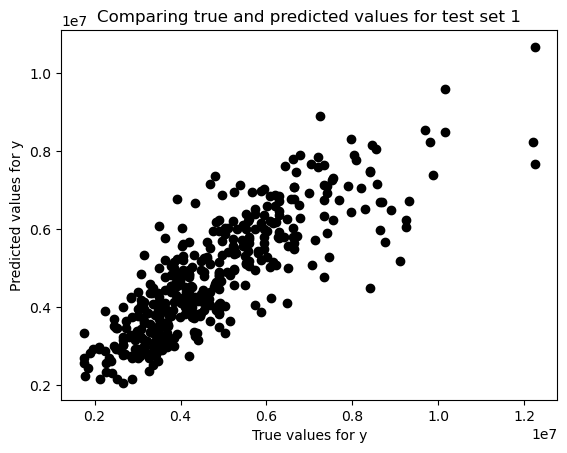

In [80]:
plt.scatter(y_train, y_pred_train1, color='black')
plt.title('Comparing true and predicted values for test set 1')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_train, y_pred_train1)))
print('R-squared = %.4f' % r2_score(y_train, y_pred_train1))

Root mean squared error = 1213263.0695
R-squared = 0.6280


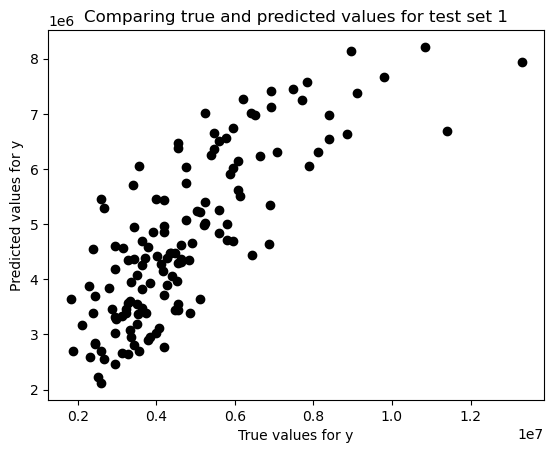

In [81]:
plt.scatter(y_test, y_pred_test1, color='black')
plt.title('Comparing true and predicted values for test set 1')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test1)))
print('R-squared = %.4f' % r2_score(y_test, y_pred_test1))

In [56]:
model2 = linear_model.LinearRegression()

model2.fit(X_train_minmax, y_train)

LinearRegression()

In [59]:
y_pred_train2 = model2.predict(X_train_minmax)

Root mean squared error = 1011557.6205
R-squared = 0.6932


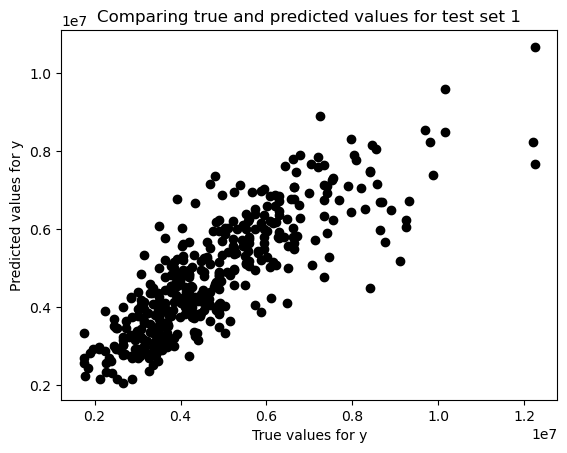

In [60]:
plt.scatter(y_train, y_pred_train2, color='black')
plt.title('Comparing true and predicted values for test set 1')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_train, y_pred_train2)))
print('R-squared = %.4f' % r2_score(y_train, y_pred_train2))

In [57]:
y_pred_test2 = model2.predict(X_test_minmax)

Root mean squared error = 1213263.0695
R-squared = 0.6280


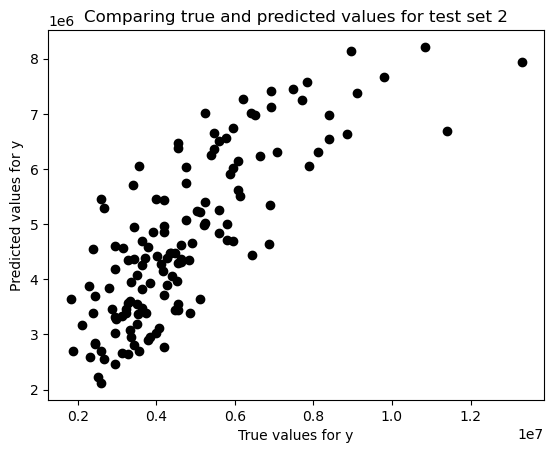

In [58]:
plt.scatter(y_test, y_pred_test2, color='black')
plt.title('Comparing true and predicted values for test set 2')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test2)))
print('R-squared = %.4f' % r2_score(y_test, y_pred_test2))

In [213]:
y_pred_test2.mean()

4718403.049752656

In [225]:
y_pred_test1.mean()

4718403.0497526545

In [214]:
y_pred_test2.max()

8213369.705178072

In [218]:
y_pred_test1.max()

8213369.705178073

In [221]:
X_train_minmax.mean()

0.3133924600768142

In [55]:
X_train_scal_std.mean()

0    -9.578395e-17
1     3.047671e-17
2    -7.510332e-17
3    -3.047671e-17
4    -4.353816e-18
5    -7.836868e-17
6     5.224579e-17
7    -1.959217e-17
8     2.612289e-17
9    -1.959217e-17
10   -4.571507e-17
11    3.047671e-17
dtype: float64

Esperaba obtener distintos resultados en cada modelo y son exactamente iguales. He revisado los datos unas cuantas veces, así como los modelos y no veo ningún fallo. Incluso he cambiado a la de Ridge y pasa lo mismo, de hecho, las diferencias de los resultados entre los dos métodos son mínimas. 
Es cierto que al escalar se debe tener unos valores que son proporcionalmente idénticos que los originales, por lo que al usar otro método no deberíamos de apreciar la diferencia, pero dado la naturaleza del ejercicio esperaba dichas diferencias.
Vamos a comparar ahora sin los datos de entrada normalizados.

In [61]:
model3 = linear_model.LinearRegression()

model3.fit(X_train, y_train)

LinearRegression()

In [62]:
y_pred_test3 = model3.predict(X_test)

Root mean squared error = 1213263.0695
R-squared = 0.6280


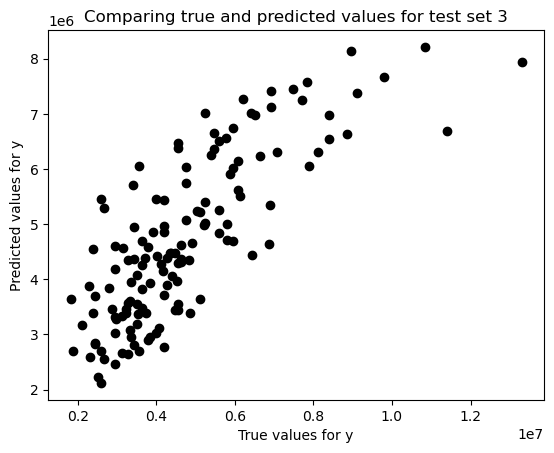

In [63]:
plt.scatter(y_test, y_pred_test3, color='black')
plt.title('Comparing true and predicted values for test set 3')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test3)))
print('R-squared = %.4f' % r2_score(y_test, y_pred_test3))

In [64]:
y_pred_test3.mean()

4718403.049752655

No obtenemos diferencia alguna... Quizás sea por los datos en sí, 

### Pregunta 5

##### Comparación de Modelos de Regresión Ridge, Lasso y Elastic Net con Scikit-Learn

- Importa los módulos necesarios para utilizar la regresión Ridge, Lasso y Elastic Net
- Elige y carga un dataset de Scikit-Learn adecuado para la regresión
- Realiza cualquier pre-procesamiento necesario en el dataset, **como la normalización de características si es necesario**
- Divide el dataset en conjuntos de entrenamiento y prueba usando la función train_test_split
- Configura y entrena un modelo de regresión para Ridge, Lasso y Elastic Net con el conjunto de entrenamiento.
- Asegúrate de experimentar con diferentes hiperparámetros para cada modelo, como el coeficiente de regularización
- Evalúa cada modelo con el conjunto de prueba utilizando métricas adecuadas para regresión, como el error cuadrático medio (MSE) o el coeficiente de determinación (R²)
- Compara cómo diferentes valores de hiperparámetros afectan el rendimiento de cada modelo.
- Analiza los resultados obtenidos y determina cuál modelo y configuración de hiperparámetros ofrece el mejor rendimiento
- Concluye sobre las características de cada modelo y cómo influyen en el ajuste a los datos

In [345]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [239]:
dataset = datasets.load_diabetes()

In [240]:
ext_target = dataset.target[:, None]
X = pd.DataFrame(
    np.concatenate((dataset.data, ext_target), axis=1),
    columns=dataset.feature_names + ['target'],
)
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [241]:
X.isna().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [242]:
y = X.target.copy()
X.drop("target", axis=1, inplace=True)

Vemos que las variables explicativas parecen estar escaladas por lo que no es necesario realizart ningún escalamiento.

In [244]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

RIDGE

In [287]:
ridge_reg1 = Ridge(alpha=0.1, solver="cholesky")
ridge_reg1.fit(X_train, y_train)
y_pred_test = ridge_reg1.predict(X_test)

Root mean squared error = 54.1716
R-squared = 0.4379


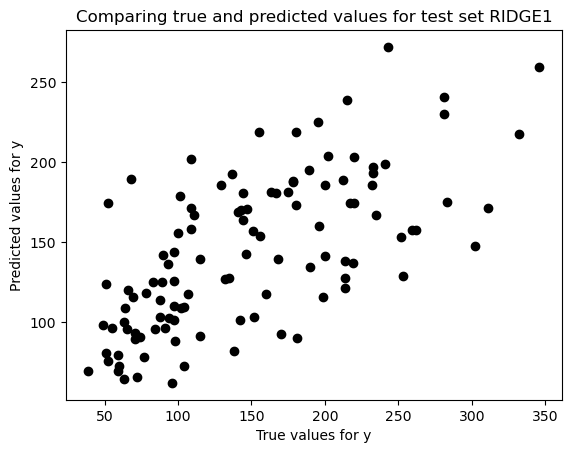

In [288]:
plt.scatter(y_test, y_pred_test, color='black')
plt.title('Comparing true and predicted values for test set RIDGE1')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('R-squared = %.4f' % r2_score(y_test, y_pred_test))

In [289]:
ridge_reg2 = Ridge(alpha=1, solver="cholesky")
ridge_reg2.fit(X_train, y_train)
y_pred_test = ridge_reg2.predict(X_test)

Root mean squared error = 56.6956
R-squared = 0.3844


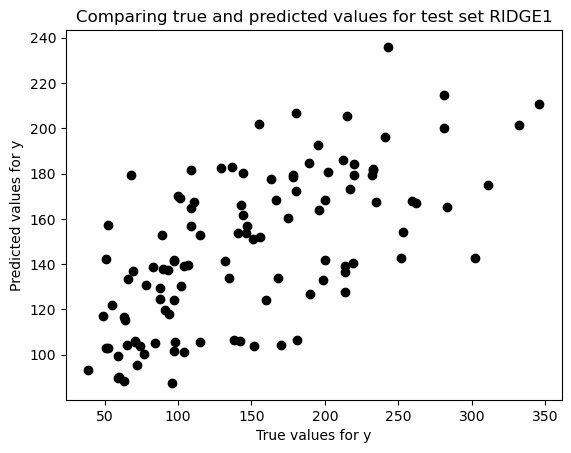

In [290]:
plt.scatter(y_test, y_pred_test, color='black')
plt.title('Comparing true and predicted values for test set RIDGE2')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('R-squared = %.4f' % r2_score(y_test, y_pred_test))

In [303]:
ridge_reg3 = Ridge(alpha=0.001, solver="cholesky")
ridge_reg3.fit(X_train, y_train)
y_pred_test = ridge_reg3.predict(X_test)

Root mean squared error = 53.9300
R-squared = 0.4429


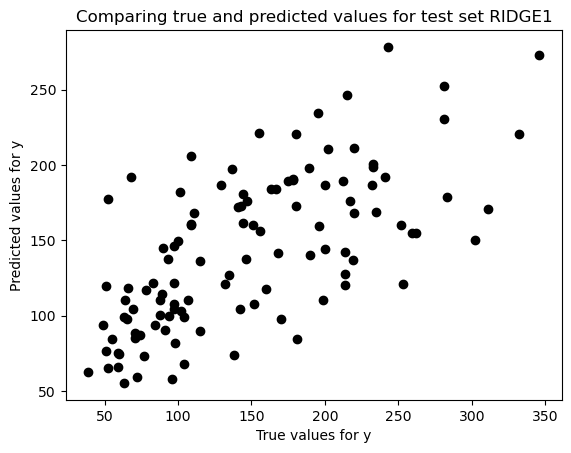

In [304]:
plt.scatter(y_test, y_pred_test, color='black')
plt.title('Comparing true and predicted values for test set RIDGE3')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('R-squared = %.4f' % r2_score(y_test, y_pred_test))

Vemos como no necesita un término de regularización en el modelo estimado con Ridge, dado que a medida que disminuimos y nos acercamos a 0 el rendimiento del modelo aumenta.

LASSO

In [316]:
lasso_reg1 = Lasso(alpha=0.1)
lasso_reg1.fit(X_train, y_train)
y_pred_test = lasso_reg1.predict(X_test)


Root mean squared error = 54.5682
R-squared = 0.4297


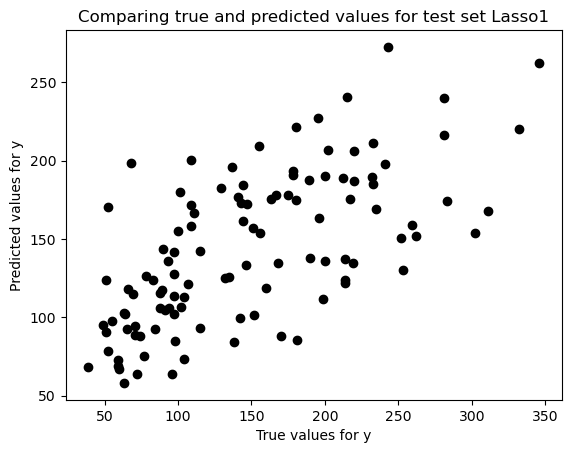

In [317]:
plt.scatter(y_test, y_pred_test, color='black')
plt.title('Comparing true and predicted values for test set Lasso1')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('R-squared = %.4f' % r2_score(y_test, y_pred_test))

In [320]:
lasso_reg2 = Lasso(alpha=0.001)
lasso_reg2.fit(X_train, y_train)
y_pred_test = lasso_reg2.predict(X_test)

Root mean squared error = 53.9176
R-squared = 0.4432


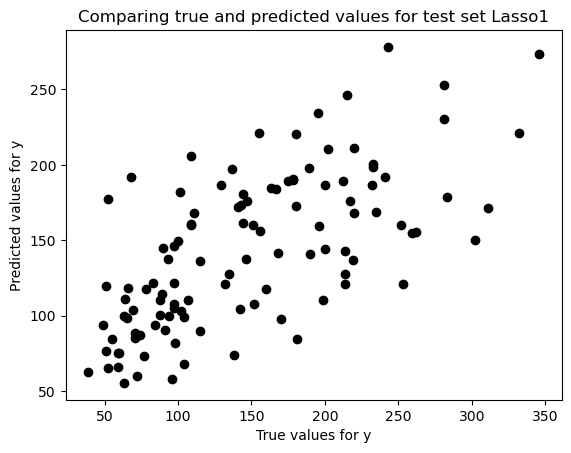

In [321]:
plt.scatter(y_test, y_pred_test, color='black')
plt.title('Comparing true and predicted values for test set Lasso1')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('R-squared = %.4f' % r2_score(y_test, y_pred_test))

In [322]:
lasso_reg3 = Lasso(alpha=1)
lasso_reg3.fit(X_train, y_train)
y_pred_test = lasso_reg3.predict(X_test)

Root mean squared error = 60.2588
R-squared = 0.3045


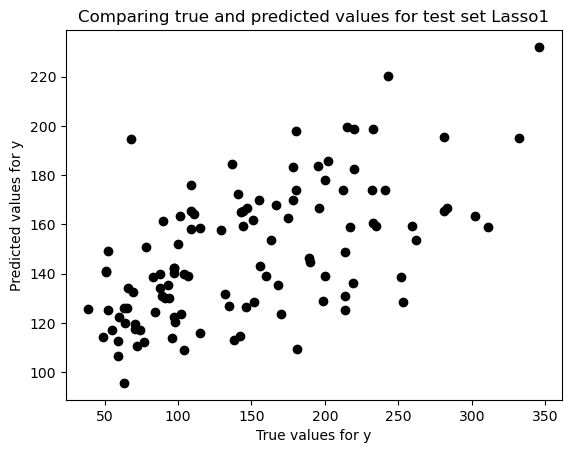

In [323]:
plt.scatter(y_test, y_pred_test, color='black')
plt.title('Comparing true and predicted values for test set Lasso3')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('R-squared = %.4f' % r2_score(y_test, y_pred_test))

Vemos que pasa lo mismo. Aunque sí hay una leve mejora respecto a Ridge.

ELASTIC NET

In [337]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)
y_pred_test = elastic_net.predict(X_test)

Root mean squared error = 68.7410
R-squared = 0.0950


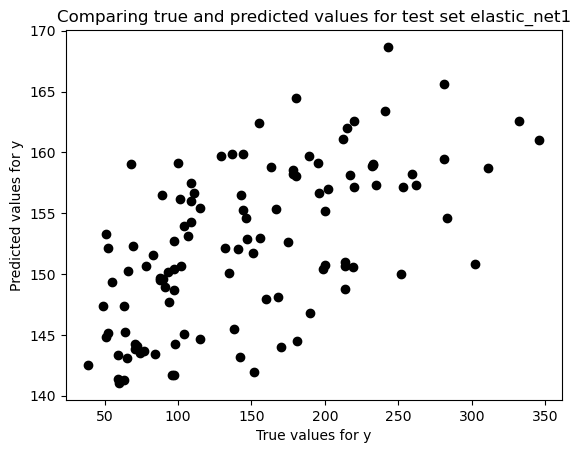

In [338]:
plt.scatter(y_test, y_pred_test, color='black')
plt.title('Comparing true and predicted values for test set elastic_net1')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('R-squared = %.4f' % r2_score(y_test, y_pred_test))

In [339]:
elastic_net2 = ElasticNet(alpha=0.1, l1_ratio=1)
elastic_net2.fit(X_train, y_train)
y_pred_test = elastic_net2.predict(X_test)

Root mean squared error = 54.5682
R-squared = 0.4297


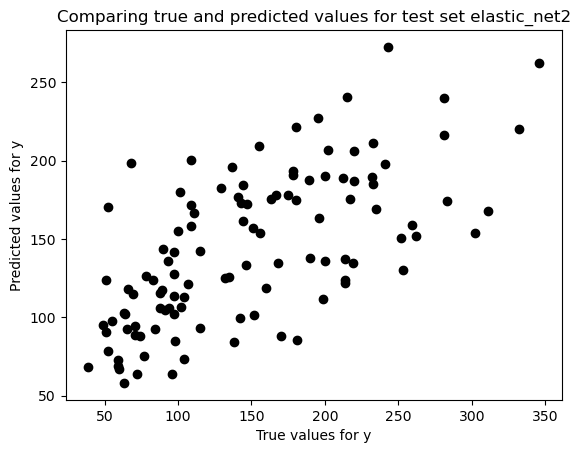

In [340]:
plt.scatter(y_test, y_pred_test, color='black')
plt.title('Comparing true and predicted values for test set elastic_net2')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('R-squared = %.4f' % r2_score(y_test, y_pred_test))

In [343]:
elastic_net3 = ElasticNet(alpha=0.001, l1_ratio=1)
elastic_net3.fit(X_train, y_train)
y_pred_test = elastic_net3.predict(X_test)

Root mean squared error = 53.9176
R-squared = 0.4432


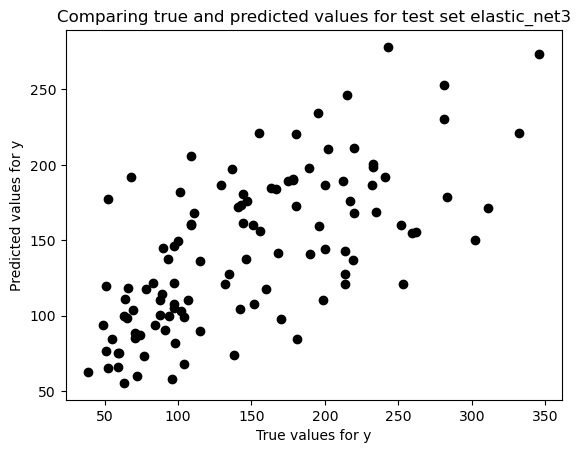

In [344]:
plt.scatter(y_test, y_pred_test, color='black')
plt.title('Comparing true and predicted values for test set elastic_net3')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('R-squared = %.4f' % r2_score(y_test, y_pred_test))

Vemos que obtenemos mejores resultados a medida que aumentamos el L1 ratio y disminuimos alpha. En el caso de L1 = 1 es como si no existiese, y al aplicar alpha=0.001 obtenemos el mismo resultado que en Lasso con el mismo alpha.
Por tanto el mejor modelo se puede obtener tanto con lasso como conelastic_net y con el menor alpha.

### Pregunta 6

##### Entrenar un modelo de SVM con kernel no lineal, con un dataset de scikit-learn (para clasificación binaria, como el breast_cancer) y evaluar la influencia de sus parámetros

- Importa svm para el modelo SVM
- Elige un dataset proporcionado por Scikit-Learn adecuado para clasificación binaria
- Divide el dataset en conjuntos de entrenamiento y prueba utilizando la función train_test_split
- Configura el modelo SVM seleccionando un kernel no lineal, como 'rbf', 'poly', o 'sigmoid'
- Asegúrate de entender las implicaciones de cada tipo de kernel y cómo pueden afectar el modelo
- Varía los parámetros importantes del kernel elegido, como C (parámetro de regularización), gamma (parámetro del kernel), y otros parámetros específicos del kernel como el grado en el caso del kernel polinómico.
- Entrena múltiples modelos con diferentes combinaciones de estos parámetros
- Utiliza una métrica de evaluación adecuada para evaluar el modelo en el conjunto de prueba, como la precisión, el área bajo la curva ROC, etc...
- Compara cómo diferentes valores de parámetros afectan el rendimiento del modelo
- Reflexiona sobre cómo la selección y ajuste de parámetros pueden mejorar o empeorar el modelo

In [82]:
from sklearn.svm import SVC

In [83]:
cancer = datasets.load_breast_cancer()

In [84]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [85]:
cancer.feature_names = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension']

In [86]:
ext_target = cancer.target[:, None]
X = pd.DataFrame(
    np.concatenate((cancer.data, ext_target, cancer.target_names[ext_target]), axis=1),
    columns=cancer.feature_names + ['target_label', 'target_name'],
)
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target_label,target_name
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,...,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,0,malignant
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.8,1956.0,0.1238,0.1866,0.2416,0.186,0.275,0.08902,0,malignant
2,19.69,21.25,130.0,1203.0,0.1096,0.1599,0.1974,0.1279,0.2069,0.05999,...,152.5,1709.0,0.1444,0.4245,0.4504,0.243,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173,0,malignant
4,20.29,14.34,135.1,1297.0,0.1003,0.1328,0.198,0.1043,0.1809,0.05883,...,152.2,1575.0,0.1374,0.205,0.4,0.1625,0.2364,0.07678,0,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.0,1479.0,0.111,0.1159,0.2439,0.1389,0.1726,0.05623,...,166.1,2027.0,0.141,0.2113,0.4107,0.2216,0.206,0.07115,0,malignant
565,20.13,28.25,131.2,1261.0,0.0978,0.1034,0.144,0.09791,0.1752,0.05533,...,155.0,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637,0,malignant
566,16.6,28.08,108.3,858.1,0.08455,0.1023,0.09251,0.05302,0.159,0.05648,...,126.7,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.0782,0,malignant
567,20.6,29.33,140.1,1265.0,0.1178,0.277,0.3514,0.152,0.2397,0.07016,...,184.6,1821.0,0.165,0.8681,0.9387,0.265,0.4087,0.124,0,malignant


In [88]:
y = X.target_label.copy()
X.drop(["target_label", "target_name"], axis=1, inplace=True)

In [89]:
y = y.astype("category").cat.codes

In [90]:
X.isna().sum().sum()

0

In [91]:
X.shape

(569, 30)

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.25)

In [93]:
from sklearn import preprocessing

normaliser = preprocessing.Normalizer().fit(X_train)

In [94]:
X_train_normalised = normaliser.transform(X_train)
X_train = pd.DataFrame(X_train_normalised)

X_test_normalised = normaliser.transform(X_test)
X_test = pd.DataFrame(X_test_normalised)


In [97]:
svm1 = SVC(kernel='rbf', C=1, gamma=1).fit(X_train, y_train)
svm2 = SVC(kernel='rbf', C=1, gamma=10).fit(X_train, y_train)
svm3 = SVC(kernel='rbf', C=10, gamma=1).fit(X_train, y_train)
svm4 = SVC(kernel='rbf', C=2, gamma=2).fit(X_train, y_train)

[1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1]
AUC: 0.785


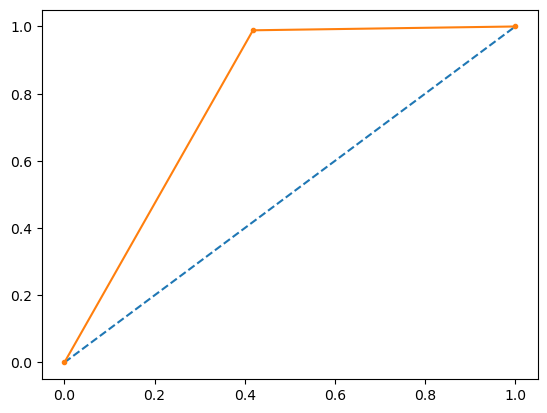

In [98]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
%matplotlib inline
probs = svm1.predict(X_test)



print(probs)

auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)

pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()

[1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0
 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0 0 1]
AUC: 0.913


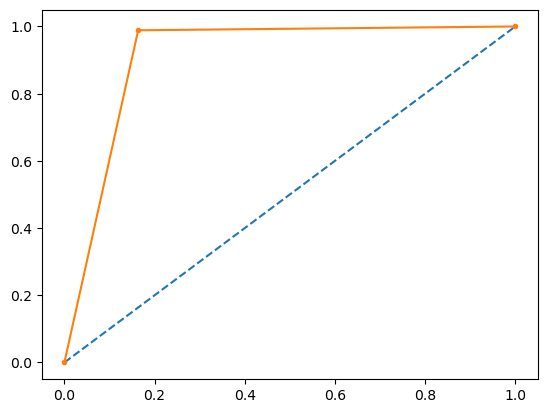

In [455]:
probs = svm2.predict(X_test)



print(probs)

auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)

pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()

[1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0
 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0
 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1
 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0 0 1]
AUC: 0.916


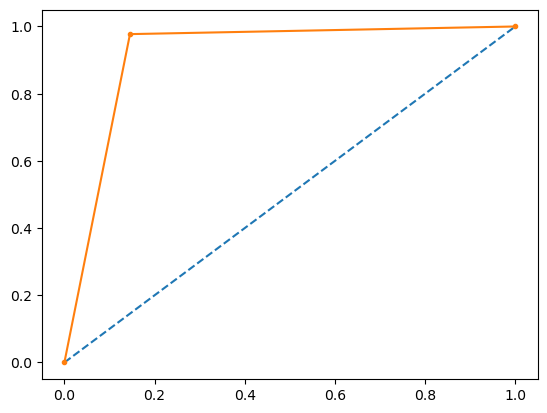

In [456]:
probs = svm3.predict(X_test)



print(probs)

auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)

pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()

[1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1]
AUC: 0.867


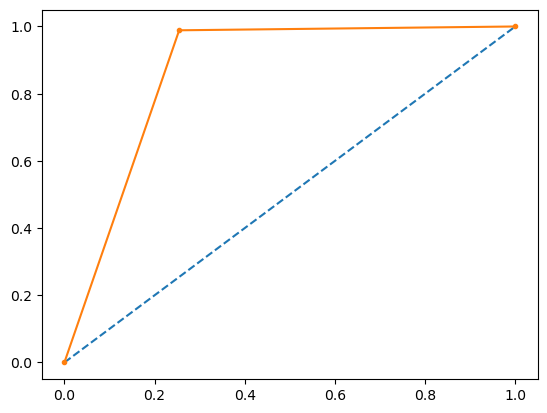

In [462]:
probs = svm4.predict(X_test)



print(probs)

auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)

pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()

In [463]:
svm5 = SVC(kernel='sigmoid', C=1, gamma=1).fit(X_train, y_train)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
AUC: 0.536


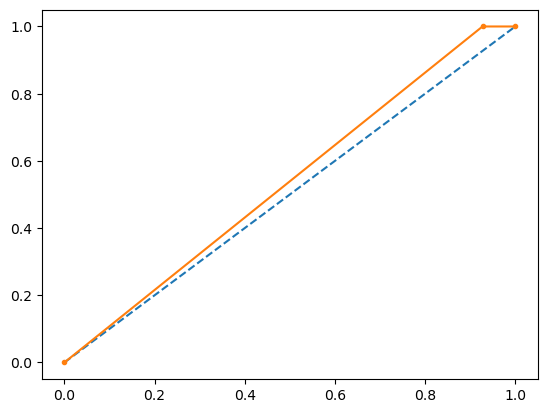

In [464]:
probs = svm5.predict(X_test)



print(probs)

auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)

pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()

In [465]:
probs1 = svm1.predict(X_test)
probs2 = svm2.predict(X_test)
probs3 = svm3.predict(X_test)
probs4 = svm4.predict(X_test)
probs5 = svm5.predict(X_test)

In [466]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, probs1)))
print('Precision: {:.2f}'.format(precision_score(y_test, probs1)))
print('Recall: {:.2f}'.format(recall_score(y_test, probs1)))
print('F1: {:.2f}'.format(f1_score(y_test, probs1)))

Accuracy: 0.83
Precision: 0.79
Recall: 0.99
F1: 0.88


In [467]:

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, probs2)))
print('Precision: {:.2f}'.format(precision_score(y_test, probs2)))
print('Recall: {:.2f}'.format(recall_score(y_test, probs2)))
print('F1: {:.2f}'.format(f1_score(y_test, probs2)))

Accuracy: 0.93
Precision: 0.91
Recall: 0.99
F1: 0.95


In [468]:

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, probs3)))
print('Precision: {:.2f}'.format(precision_score(y_test, probs3)))
print('Recall: {:.2f}'.format(recall_score(y_test, probs3)))
print('F1: {:.2f}'.format(f1_score(y_test, probs3)))

Accuracy: 0.93
Precision: 0.91
Recall: 0.98
F1: 0.95


In [469]:

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, probs4)))
print('Precision: {:.2f}'.format(precision_score(y_test, probs4)))
print('Recall: {:.2f}'.format(recall_score(y_test, probs4)))
print('F1: {:.2f}'.format(f1_score(y_test, probs4)))

Accuracy: 0.90
Precision: 0.86
Recall: 0.99
F1: 0.92


In [470]:

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, probs5)))
print('Precision: {:.2f}'.format(precision_score(y_test, probs5)))
print('Recall: {:.2f}'.format(recall_score(y_test, probs5)))
print('F1: {:.2f}'.format(f1_score(y_test, probs5)))

Accuracy: 0.64
Precision: 0.63
Recall: 1.00
F1: 0.78


Vemos que con un kernel rbf obtenemos mejores resultados que un kernel sigmoidal con los mismos hiperparámetros, por lo que en un principio vemos que se ajusta mejor con el primer kernel. Por otro lado, al aumentar tanto el coste "C" como gamma, al aumentarlos se ajusta mejor el modelo, pero corremos el riesgo de sobreajustar el modelo, por lo que no podríamos generalizar apropiadamente. Vemos de igual manera que obtenemos buenos resultados en cuanto a la exactitud obtenida, que al fijarnos en la precisión y la sensibilidad vemos que hay un buen equilibrio entre ambas (excepto en el modelo sigmoidal que predice casi siempre 1) por lo que es un buen indicador para el modelo. Aunque vemos que hay más dificultad en predecir los casos positivos que los negativos, por lo que hay que determinar que coste tiene esto.

### Pregunta 7

##### Realización de estrategias diferentes de Cross-Validation sobre un conjunto de datos y evaluar los resultados

- Elige y carga un dataset proporcionado por Scikit-Learn que sea adecuado para el tipo de análisis que vas a realizar
- Si es necesario, realiza preprocesamientos como la **normalización** o la codificación de variables categóricas
- Elige un modelo de aprendizaje automático de Scikit-Learn adecuado para tu dataset entre los vistos en clase hasta ahora
- Selecciona al menos dos estrategias de validación cruzada para comparar. Por ejemplo, podrías elegir la validación cruzada K-Fold estándar (que la puedes configurar directamente con un número en el método cross_val_score), la validación cruzada estratificada (Stratified K-Fold) o la Repeated Stratified K-Fold
- Utiliza las funciones de Scikit-Learn para aplicar cada estrategia de validación cruzada al modelo y al conjunto de datos
- Registra los resultados de rendimiento que establezcas para cada iteración de la validación cruzada
- Analiza los resultados obtenidos de cada estrategia de validación cruzada
- Compara las métricas de rendimiento que establezcas, entre las diferentes estrategias, para ver cuál de los Cross-Validation ofrece una evaluación más robusta o resultados más consistentes (evaluar dispersión de los resultados para las repeticiones de cada fold)
- Reflexiona sobre cómo la elección de la estrategia de validación cruzada puede influir en la interpretación de la capacidad predictiva del modelo

In [99]:
iris = datasets.load_iris()

In [100]:
names(iris)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [101]:
ext_target = iris.target[:, None]
X = pd.DataFrame(
    np.concatenate((iris.data, ext_target, iris.target_names[ext_target]), axis=1),
    columns=iris.feature_names + ['target_label', 'target_name'],
)

In [102]:
y = X.target_label.copy()
X.drop(["target_label", "target_name"], axis=1, inplace=True)

In [103]:
y = y.astype("category").cat.codes

In [104]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [105]:
from sklearn import preprocessing

normaliser = preprocessing.Normalizer().fit(X)

In [106]:
X_normalised = normaliser.transform(X)
X = pd.DataFrame(X_normalised)

Utilizaremos el método cross validation estándar y la estratificada repetida.

In [112]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn_model = KNeighborsClassifier()

resultados_kfold = cross_val_score(knn_model, X, y, cv=10,scoring='accuracy')
print(f"Los resultados para las 10 particiones son: {resultados_kfold}")
print(f"Es decir, tiene un resultado de: {resultados_kfold.mean()} +/- {resultados_kfold.std()}")

Los resultados para las 10 particiones son: [1.         1.         1.         1.         0.86666667 0.93333333
 0.8        1.         1.         1.        ]
Es decir, tiene un resultado de: 0.96 +/- 0.06798692684790378


Vemos que obtenemos buen accuracy en el modelo para cada iteracción. Para determinar que número de k vecinos es mejor podemos utilizar un bucle for con el método anterior de kfolds=10

[0.96, 0.9533333333333334, 0.9733333333333334, 0.9733333333333334, 0.96, 0.9666666666666668, 0.96, 0.9666666666666668, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.96, 0.9666666666666668, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9800000000000001, 0.9800000000000001, 0.9800000000000001, 0.9800000000000001, 0.9800000000000001, 0.9800000000000001, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334]


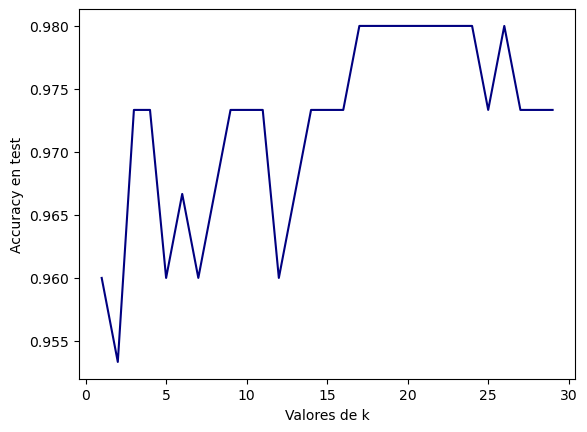

In [523]:
def entrenar_y_dibujar(inputs, targets):
    hiper_k_rango = range(1,30)
    scores=[]
    for k in hiper_k_rango:
        knn_model = KNeighborsClassifier(n_neighbors=k)
        resultados_kfold = cross_val_score(knn_model,X, y, cv=10,scoring='accuracy')
        scores.append(resultados_kfold.mean())
        
    print(scores)
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.figure()
    
    plt.plot(hiper_k_rango,scores, color='navy')

    plt.xlabel("Valores de k")
    plt.ylabel("Accuracy en test")

entrenar_y_dibujar(X, y)

Vemos que la mejor combinación de 10kfolds con el modelo knn es con 17 vecinos.

[0.9622666666666666, 0.9553333333333335, 0.9773333333333334, 0.9721333333333334, 0.9689333333333334, 0.9717333333333333, 0.9722666666666668, 0.9680000000000002, 0.9684, 0.9692000000000002, 0.9696, 0.9677333333333333, 0.9692000000000001, 0.9686666666666668, 0.9713333333333334, 0.9734666666666668, 0.9765333333333333, 0.9762666666666666, 0.9793333333333333, 0.9798666666666667, 0.9784, 0.9781333333333334, 0.9762666666666667, 0.9777333333333333, 0.9741333333333334, 0.976, 0.9746666666666668, 0.9761333333333334, 0.9741333333333334]


Text(0, 0.5, 'Accuracy en 50 repeticiones 10-fold cross-validation')

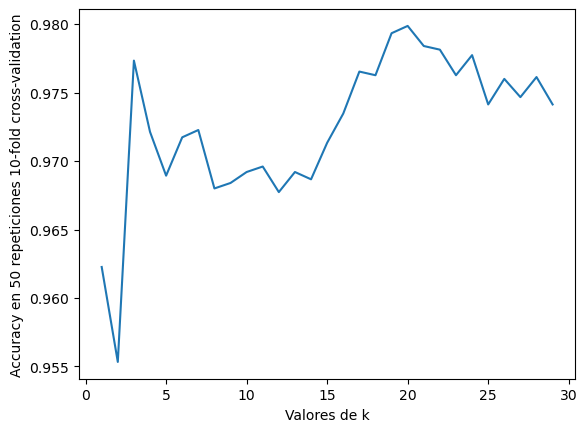

In [524]:
from sklearn.model_selection import cross_val_score,RepeatedStratifiedKFold

hiper_k_rango = range(1,30)
scores=[]
RKFold_stratified = RepeatedStratifiedKFold(n_splits=10,n_repeats=50)

for k in hiper_k_rango:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    resultados_kfold = cross_val_score(knn_model,X,y,cv=RKFold_stratified,scoring='accuracy')
    scores.append(resultados_kfold.mean())
    
scores_media_Kfold = scores

print(scores)
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(hiper_k_rango,scores)
plt.xlabel("Valores de k")
plt.ylabel("Accuracy en 50 repeticiones 10-fold cross-validation")

En este caso vemos que el mejor valor de k vecinos es de 20. Aunque con 2 ya obtenemos unos resultados muy parecidos y es posible que ahorremos en procesamiento.

Vemos de igual manera en el gráfico que con la repeticion de cada kfold obtenemos resultados más robustos, más suave. Y con la estratificación nos aseguramos que esté equilibrado cada fold. 


In [530]:
knn_model = KNeighborsClassifier(n_neighbors=17)

In [531]:
import numpy as np
from sklearn.utils import shuffle
from matplotlib.pyplot import boxplot
from sklearn.model_selection import KFold

def cross_validate(model, x, y, folds=10, repeats=5):
    score = np.zeros((repeats, folds))
    x = np.array(x)
    for r in range(repeats):
        i=0
        print('Experimento número', str(r + 1), 'de', str(repeats))
        x,y = shuffle(x,y,random_state=r) 
        kf = KFold(n_splits=folds,random_state=i+1000,shuffle=True)
        for train_ind,test_ind in kf.split(x):
            print('Fold', i+1, 'de',folds)
            xtrain,ytrain = x[train_ind,:],y[train_ind]
            xtest,ytest = x[test_ind,:],y[test_ind]
            model.fit(xtrain, ytrain)
            score[r,i]=metrics.accuracy_score(model.predict(xtest), ytest)
            i+=1
        print('\nAccuracy del experimento:',str(np.mean(score[r, :])))
    print('\nResults:',str(score))
    print('Media:',str(np.mean(score)))
    print('Desviación:',str(np.std(score)))
    return score

score=cross_validate(knn_model, X, y, folds=10, repeats=5)

Experimento número 1 de 5
Fold 1 de 10
Fold 2 de 10
Fold 3 de 10
Fold 4 de 10
Fold 5 de 10
Fold 6 de 10
Fold 7 de 10
Fold 8 de 10
Fold 9 de 10
Fold 10 de 10

Accuracy del experimento: 0.30000000000000004
Experimento número 2 de 5
Fold 1 de 10
Fold 2 de 10
Fold 3 de 10
Fold 4 de 10
Fold 5 de 10
Fold 6 de 10
Fold 7 de 10
Fold 8 de 10
Fold 9 de 10
Fold 10 de 10

Accuracy del experimento: 0.2866666666666667
Experimento número 3 de 5
Fold 1 de 10
Fold 2 de 10
Fold 3 de 10
Fold 4 de 10
Fold 5 de 10
Fold 6 de 10
Fold 7 de 10
Fold 8 de 10
Fold 9 de 10
Fold 10 de 10

Accuracy del experimento: 0.3066666666666667
Experimento número 4 de 5
Fold 1 de 10
Fold 2 de 10
Fold 3 de 10
Fold 4 de 10
Fold 5 de 10
Fold 6 de 10
Fold 7 de 10
Fold 8 de 10
Fold 9 de 10
Fold 10 de 10

Accuracy del experimento: 0.31999999999999995
Experimento número 5 de 5
Fold 1 de 10
Fold 2 de 10
Fold 3 de 10
Fold 4 de 10
Fold 5 de 10
Fold 6 de 10
Fold 7 de 10
Fold 8 de 10
Fold 9 de 10
Fold 10 de 10

Accuracy del experimento: 0.

[[0.26666667 0.33333333 0.33333333 0.4        0.33333333 0.2
  0.2        0.4        0.2        0.33333333]
 [0.26666667 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
  0.13333333 0.26666667 0.2        0.33333333]
 [0.26666667 0.4        0.2        0.13333333 0.33333333 0.26666667
  0.33333333 0.53333333 0.2        0.4       ]
 [0.4        0.2        0.13333333 0.26666667 0.26666667 0.4
  0.26666667 0.6        0.26666667 0.4       ]
 [0.4        0.26666667 0.06666667 0.33333333 0.2        0.46666667
  0.2        0.33333333 0.33333333 0.13333333]]


{'whiskers': [<matplotlib.lines.Line2D at 0x2088ebd78d0>,
 'caps': [<matplotlib.lines.Line2D at 0x208939b0690>,
 'boxes': [<matplotlib.lines.Line2D at 0x208907c1150>,
 'medians': [<matplotlib.lines.Line2D at 0x2088ec7cc50>,
 'fliers': [<matplotlib.lines.Line2D at 0x2088ebd4d10>,
 'means': []}

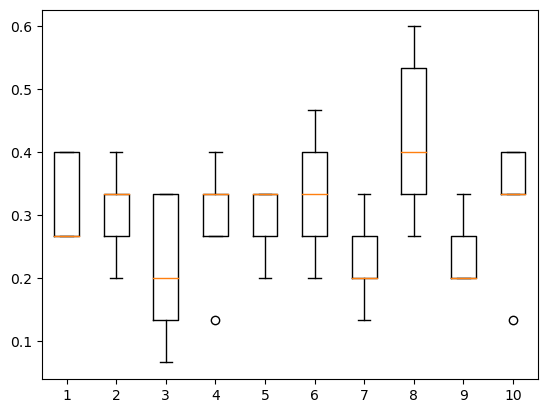

In [532]:
print(score)
boxplot(score)

Aqui vemos el valor obtenido en accuracy para las 5 repeticiones de cada fold. Se aprecia que se puede obtener para el mismo fold notables valores distintos. Vemos que hay una desviación tipica grande para el valor de la media general (media 0.3, sd 0.1)

Utilizar el método de validación cruzada para el remuestreo garantiza que todas las observaciones de la serie de datos original tengan la oportunidad de aparecer como datos de entrenamiento y de prueba. Y en caso de disponer de pocos datos de entrada este resulta muy útil.

### Pregunta 8

##### Buscar parámetros óptimos con GridSearchCV entrenando modelos SVM

- Importa las librerías y módulos necesarios de Python y Scikit-Learn, incluyendo el módulo svm para el modelo SVM y model_selection para GridSearchCV
- Elige y carga un dataset de Scikit-Learn adecuado para trabajar con un modelo SVM
- Divide el dataset en conjuntos de entrenamiento y prueba utilizando la función train_test_split
- Crea una instancia del modelo SVM que deseas optimizar
- Establece un diccionario de parámetros para probar con GridSearch. Incluye parámetros como C, kernel, gamma y otros relevantes para el modelo SVM
- Configura GridSearchCV con el modelo SVM, el diccionario de parámetros, y cualquier otra configuración relevante como la métrica de evaluación y el número de folds para la validación cruzada
- Entrena GridSearchCV con el conjunto de entrenamiento para buscar los mejores parámetros
- Una vez que GridSearchCV haya encontrado la mejor combinación de parámetros, evalúa este modelo óptimo en el conjunto de prueba
- Utiliza métricas de rendimiento adecuadas, como la precisión o el área bajo la curva ROC, para evaluar su desempeño
- Revisa los parámetros que GridSearchCV ha identificado como óptimos

In [113]:
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

In [114]:
cancer = datasets.load_breast_cancer()

In [115]:
cancer.feature_names = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension']

In [116]:
ext_target = cancer.target[:, None]
X = pd.DataFrame(
    np.concatenate((cancer.data, ext_target, cancer.target_names[ext_target]), axis=1),
    columns=cancer.feature_names + ['target_label', 'target_name'])
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target_label,target_name
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,...,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,0,malignant
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.8,1956.0,0.1238,0.1866,0.2416,0.186,0.275,0.08902,0,malignant
2,19.69,21.25,130.0,1203.0,0.1096,0.1599,0.1974,0.1279,0.2069,0.05999,...,152.5,1709.0,0.1444,0.4245,0.4504,0.243,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173,0,malignant
4,20.29,14.34,135.1,1297.0,0.1003,0.1328,0.198,0.1043,0.1809,0.05883,...,152.2,1575.0,0.1374,0.205,0.4,0.1625,0.2364,0.07678,0,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.0,1479.0,0.111,0.1159,0.2439,0.1389,0.1726,0.05623,...,166.1,2027.0,0.141,0.2113,0.4107,0.2216,0.206,0.07115,0,malignant
565,20.13,28.25,131.2,1261.0,0.0978,0.1034,0.144,0.09791,0.1752,0.05533,...,155.0,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637,0,malignant
566,16.6,28.08,108.3,858.1,0.08455,0.1023,0.09251,0.05302,0.159,0.05648,...,126.7,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.0782,0,malignant
567,20.6,29.33,140.1,1265.0,0.1178,0.277,0.3514,0.152,0.2397,0.07016,...,184.6,1821.0,0.165,0.8681,0.9387,0.265,0.4087,0.124,0,malignant


In [117]:
y = X.target_label.copy()
X.drop(["target_label", "target_name"], axis=1, inplace=True)

In [118]:
y = y.astype("category").cat.codes

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.25)

In [120]:
normaliser = preprocessing.Normalizer().fit(X_train)

In [121]:
X_train_normalised = normaliser.transform(X_train)
X_train = pd.DataFrame(X_train_normalised)

X_test_normalised = normaliser.transform(X_test)
X_test = pd.DataFrame(X_test_normalised)


In [157]:
from sklearn import svm
import numpy as np

modelo_SVM = svm.SVC()
print(svm.SVC.get_params(modelo_SVM))

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [184]:
grid_parametros =[
    {'C':[1, 3, 5, 7, 9, 20], 'kernel':['linear', 'poly', 'rbf', 'sigmoid']},
    {'probability':[False, True],'gamma':[0, 0.5, 1, 2, 3], 'degree':[2,3,4,5]},
]


grid_search = GridSearchCV(
    modelo_SVM, 
    grid_parametros, 
    cv=5,
    scoring='roc_auc',
    return_train_score=True
)

In [185]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 3, 5, 7, 9, 20],
                          'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
                         {'degree': [2, 3, 4, 5], 'gamma': [0, 0.5, 1, 2, 3],
                          'probability': [False, True]}],
             return_train_score=True, scoring='roc_auc')

In [186]:
print(grid_search.best_params_)

{'C': 20, 'kernel': 'poly'}


In [196]:
svm = SVC(kernel='poly', C=20).fit(X_train, y_train)

[1 0 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0
 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0
 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1
 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0 0 1]
AUC: 0.925


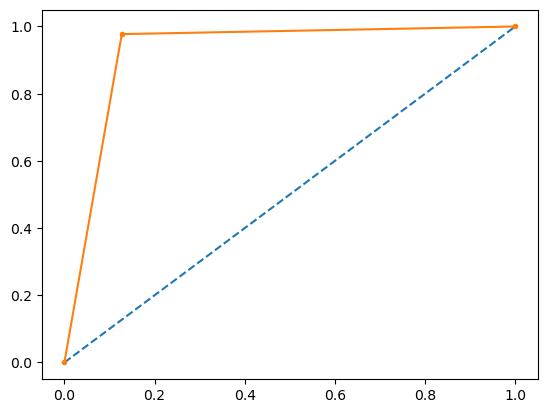

In [197]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
%matplotlib inline
probs = svm.predict(X_test)



print(probs)

auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)

pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()

In [198]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, probs)))
print('Precision: {:.2f}'.format(precision_score(y_test, probs)))
print('Recall: {:.2f}'.format(recall_score(y_test, probs)))
print('F1: {:.2f}'.format(f1_score(y_test, probs)))

Accuracy: 0.94
Precision: 0.92
Recall: 0.98
F1: 0.95


Los mejores parámetros encontrados por grid_search son: C = 20, y kernel = polinómico (de grado 3 se deduce ya que es el predefinido). Con estos parámetros seleccionados obtenemos muy buenos resultados. El restante de parámetros que no ha calculado es debido a que escogerá los predefinidos por el método.
Un resultado que me ha parecido extraño es que siempre escoge el C más elevado, lo que quiere decir que a medida que aumenta mayor es la regularización (penaliza mucho los errores) llevando al modelo a cometer menos errores a costa de un margen menor (alta regularización).

### Pregunta 9

##### Evaluación de Distintas Métricas en un Modelo de Clasificación Multiclase con Scikit-Learn

- Elige y carga un dataset de Scikit-Learn que sea adecuado para una tarea de clasificación multiclase (o incluso el de las frutas de las primeras clases)
- Divide el dataset en conjuntos de entrenamiento y prueba utilizando la función train_test_split
- Utiliza un modelo KNN para clasificación
- Entrena el modelo utilizando el conjunto de datos de entrenamiento
- Utiliza distintas métricas de evaluación de clasificación adecuadas para clasificación multiclase, como la precisión, la sensibilidad (recall), la puntuación F1, la matriz de confusión, y el área bajo la curva ROC (AUC) para cada clase
- Aplica estas métricas al modelo utilizando el conjunto de datos de prueba
- Examina los resultados obtenidos para cada métrica
- Considera la importancia de cada métrica en el contexto de tu problema específico de clasificación multiclase
- Basándote en las métricas evaluadas, concluye sobre el rendimiento general del modelo en la tarea de clasificación multiclase

In [157]:
fruits = pd.read_table('fruit_data_with_colors.txt')
fruits=fruits.rename({'Unnamed: 0': 'fruit_label'}, axis=1)

In [158]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [159]:
fruits.isna().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

In [160]:
fruits.shape

(59, 7)

In [161]:
fruits["fruit_name"].value_counts()

fruit_name
apple       19
orange      19
lemon       16
mandarin     5
Name: count, dtype: int64

Partimos de una base de datos desbalanceada por lo que utilizar validación cruzada sería crucial. Pero dado que el ejercicio pide que se haga train_test_split, dejaremos sin hacer cv.

In [162]:
X, y = fruits.loc[:, "mass":"color_score"], fruits["fruit_label"]

In [163]:
y.astype("category").cat.codes

0     0
1     0
2     0
3     1
4     1
5     1
6     1
7     1
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    2
25    2
26    2
27    2
28    2
29    2
30    2
31    2
32    2
33    2
34    2
35    2
36    2
37    2
38    2
39    2
40    2
41    2
42    2
43    3
44    3
45    3
46    3
47    3
48    3
49    3
50    3
51    3
52    3
53    3
54    3
55    3
56    3
57    3
58    3
dtype: int8

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4, stratify=y)

In [166]:
y_train.value_counts()

fruit_label
3    15
1    15
4    13
2     4
Name: count, dtype: int64

In [173]:
y_test.value_counts()

fruit_label
1    4
3    4
4    3
2    1
Name: count, dtype: int64

In [167]:
from sklearn import preprocessing

normaliser = preprocessing.Normalizer().fit(X_train)

In [168]:
X_train_norm = normaliser.transform(X_train)
X_train = pd.DataFrame(X_train_norm)

X_test_norm = normaliser.transform(X_test)
X_test = pd.DataFrame(X_test_norm)

In [174]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier().fit(X_train, y_train)

In [209]:
y_pred = knn.predict(X_test)

In [210]:
y_pred

array([2, 1, 4, 1, 1, 1, 1, 3, 1, 4, 1, 4], dtype=int64)

In [265]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[4, 0, 0, 0],
       [0, 1, 0, 0],
       [3, 0, 1, 0],
       [0, 0, 0, 3]], dtype=int64)

Según la matriz de confusión, ha clasificado bien todas las clase excepto la 3 (orange), que la clasifica mayormente como 1 (apple).

In [254]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.57      1.00      0.73         4
           2       1.00      1.00      1.00         1
           3       1.00      0.25      0.40         4
           4       1.00      1.00      1.00         3

    accuracy                           0.75        12
   macro avg       0.89      0.81      0.78        12
weighted avg       0.86      0.75      0.71        12



A partir de estas métricas se puede observar como la precisión de la clase 1 se ve afectada por sus falsos positivos, mientras que el recall de la clase 3 se ve afectado por sus falsos negativos. Que en ambos casos son las 3 observaciones predichas como clase 1 siendo realmente clase 3.

In [252]:
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
%matplotlib inline
probs = knn.predict_proba(X_test)



print(probs)

auc = roc_auc_score(y_test, probs, multi_class="ovr")
print('AUC: %.3f' % auc)

[[0.  0.8 0.2 0. ]
 [0.8 0.  0.2 0. ]
 [0.2 0.  0.2 0.6]
 [0.8 0.  0.2 0. ]
 [0.8 0.  0.2 0. ]
 [0.6 0.  0.4 0. ]
 [1.  0.  0.  0. ]
 [0.4 0.  0.6 0. ]
 [0.6 0.  0.4 0. ]
 [0.  0.  0.  1. ]
 [0.8 0.  0.2 0. ]
 [0.2 0.  0.2 0.6]]
AUC: 0.852


Obtenemos un AUC de media 0.852. Es un valor alto de aciertos reales.

In [229]:
classes = knn.classes_
classes

array([1, 2, 3, 4], dtype=int64)

In [231]:
y_prob = knn.predict_proba(X_test)


In [233]:
def get_all_roc_coordinates(y_test, y_prob):
    '''
    Calculates all the ROC Curve coordinates (tpr and fpr) by considering each point as a threshold for the predicion of the class.
    
    Args:
        y_real: The list or series with the real classes.
        y_proba: The array with the probabilities for each class, obtained by using the `.predict_proba()` method.
        
    Returns:
        tpr_list: The list of TPRs representing each threshold.
        fpr_list: The list of FPRs representing each threshold.
    '''
    tpr_list = [0]
    fpr_list = [0]
    for i in range(len(y_prob)):
        threshold = y_prob[i]
        y_pred = y_prob >= threshold
        tpr, fpr = calculate_tpr_fpr(y_test, y_pred)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list

In [238]:
def plot_roc_curve(tpr, fpr, scatter = True, ax = None):
    '''
    Plots the ROC Curve by using the list of coordinates (tpr and fpr).
    
    Args:
        tpr: The list of TPRs representing each coordinate.
        fpr: The list of FPRs representing each coordinate.
        scatter: When True, the points used on the calculation will be plotted with the line (default = True).
    '''
    if ax == None:
        plt.figure(figsize = (10, 5))
        ax = plt.axes()
    
    if scatter:
        sns.scatterplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

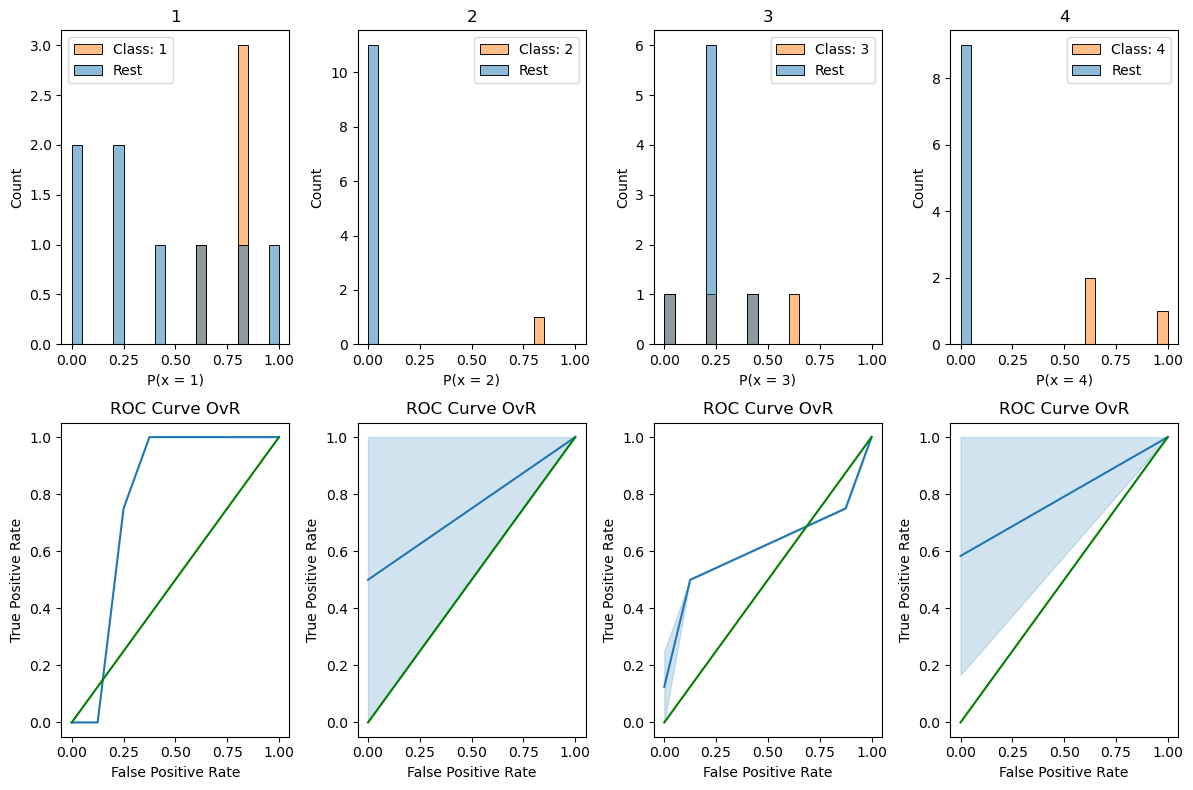

In [244]:
# Plots the Probability Distributions and the ROC Curves One vs Rest
plt.figure(figsize = (12, 8))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovr = {}

for i in range(len(classes)):
    # Gets the class
    c = classes[i]
    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = y_prob[:, i]
    df_aux = df_aux.reset_index(drop = True)
    
    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 4, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")
    
    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 4, i+5)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")
    
    # Calculates the ROC AUC OvR
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
    
plt.tight_layout()

Vemos finalmente como las clases 1 y 3 tienen unas probabilidades más aleatorias mientras que las clases 2 (mandarin) y 4 (lemon) tienen mejores predicciones. Se obtienen resultados poco suaves debido al tamaño de la muestra que es muy pequeño. Por tanto no se está generalizando bien con las manzanas y las naranjas.

Despues de evaluar cada métrica podemos llegar a la conclusión que apra tener una imagen general del comportamiento de las predicciones y su fiabilidad, debemos tener en cuenta todas estas métricas. En el caso de querer clasificar correctamente las naranjas y manzanas se debe mejorar la calidad y tamaño de los datos.

Basandonos en el rendimiento general del modelo, podemos estar seguros que los limones y las mandarinas vamos a poder clasificarlas correctamente, mientras que para manzanas y naranjas no podemos obtener generalizar con nuevos datos.